In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving compensation-a1 (1).csv to compensation-a1 (1).csv


In [5]:
# Step 2: Read the csv file into a dataframe
df = pd.read_csv('compensation-a1 (1).csv')

In [6]:
# Step 3: Describe the dataset
print(df.describe())

            Salaries       otherben   compensation
count  291825.000000  291825.000000  291825.000000
mean    63210.172887    4644.276407   97901.982292
std     44660.462305    3787.907010   67777.549152
min    -68771.780000  -10636.500000  -74082.610000
25%     23281.920000    1587.190000   35817.450000
50%     62519.120000    4349.090000   98022.370000
75%     92910.710000    6829.480000  142058.420000
max    515101.800000   35157.630000  653498.150000


In [7]:
# Remove rows with null values
df = df.dropna()

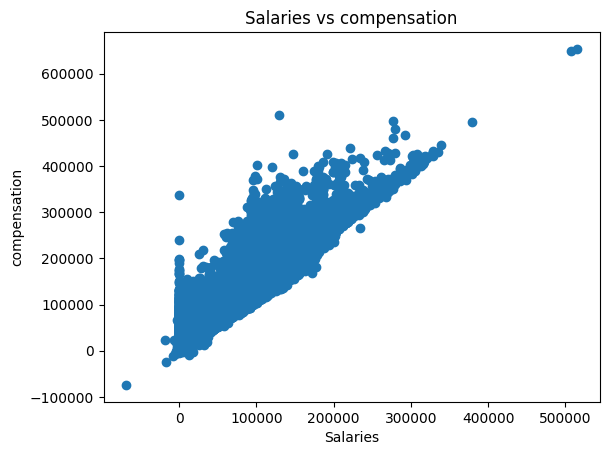

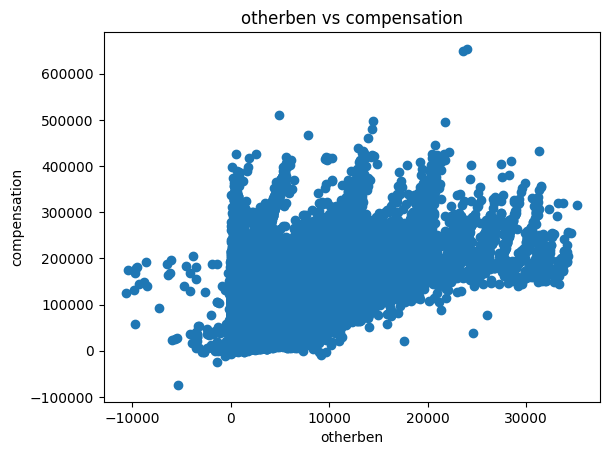

In [8]:
# Step 4: Plot each input feature against the output feature/target
for column in df.columns[:-1]:
    plt.scatter(df[column], df['compensation'])
    plt.xlabel(column)
    plt.ylabel('compensation')
    plt.title(f'{column} vs compensation')
    plt.show()

In [9]:
# Step 5: Define X and y
X = df.drop('compensation', axis=1)
y = df['compensation']

In [10]:
# Step 6: Split the dataset into training and testing partitions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step 7: Create an instance of LinearRegression
model = LinearRegression()

In [12]:
# Step 8: Fit multiple linear regression using all input features
model.fit(X_train, y_train)


LinearRegression()

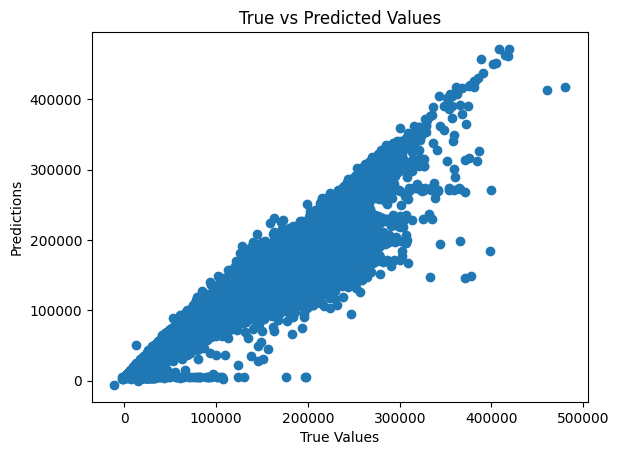

In [13]:
# Step 9: Predict values for y_test and plot true and predicted values
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


In [14]:
# Step 10: Print the score (r2)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9461601976224221


In [15]:
# Part B: KFold validation using 3, 5, and 10 splits
splits = [3, 5, 10]
for split in splits:
    kf = KFold(n_splits=split, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    print(f"Validation Score after {split} splits:", scores.mean())

Validation Score after 3 splits: 0.9460823543532891
Validation Score after 5 splits: 0.9460816769591134
Validation Score after 10 splits: 0.9460808052679411
